


<h1>Project quarter car<span class="tocSkip"></span></h1>

Please fill in the names of the team mebers.

<div class="alert alert-block alert-success">

<b>Team: 10</b>
- Jan Kruse  771828
- Matej Ivic  769965
- Tom Karaqi 764396

    
<b>Result:</b>
    
| Task   |  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |  Sum  |
|--------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|--------
| Points | 2/2 | 2/2 | 1.5/2 | 1.5/2 | 1/1 | 3/3 | 3/3 | 2/2 | 1/1 | 2/2 | 19/20|

<b> Bemerkungen zur Korrektur </b>:

Starke Leistung!
    
- Task 3: Entweder v*f' oder $\dot f$, nicht $v*\dot f$. Wichtig für Prüfungen /Klausuren: Geben Sie immer auch explizit die Substitutionen an, also wie Sie die z's definieren.
- Task 4: 1s Fahrzeit entspricht einer Strecke von 0 bis v*1s=4m. Hab's in Ihrem Code korrigiert.
- Task 8: Hier können Sie sich das Leben leichter machen, indem Sie die DGL gleich mit den konkreten, numerischen Werten definieren. Das spart dann die ganzen "Subs". Ich habe Ihnen die alternative Implementation in Ihrer Funktion dargestellt.    
    
</div>

## Packages

<div class="alert alert-block alert-danger">
    
<b>Important: Do not import other packages or libraries!</b>
    
</div>

### Python

In [1]:
from platform import python_version
print('python version = '+ python_version())

python version = 3.11.7


### Display images and videos

In [2]:
from IPython.display import HTML, Image, IFrame, YouTubeVideo

### NumPy

In [3]:
import numpy as np
print('numpy version = '+ np.__version__)

numpy version = 1.26.4


### SymPy

In [4]:
import sympy as sp
print('sympy version = '+ sp.__version__)
sp.init_printing()

sympy version = 1.12


### Matplotlib

In [5]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
print('matplotlib version = '+ matplotlib.__version__)

matplotlib version = 3.8.0


### Google Colab
If you are using Google Colab mount drive and change directory.

In [6]:
if 'google.colab' in str(get_ipython()):
    print('Running on Google Colab')
    from google.colab import drive
    drive.mount('/content/gdrive')
    %cd '/content/gdrive/MyDrive/Colab Notebooks/Modelling and Simulation/quarter_car'
else:
    print('Not running on Google Colab')

Not running on Google Colab


## 1 Modelling
Vehicle dynamics describes the effect of forces on moving vehicles, such as cars.
In the simulation of vehicle dynamics, the behavior of a digital vehicle model is calculated by computer programs.
In this process, certain driving situations are performed virtually.
A realistic simulation requires a complex modelling of the parts installed in the vehicle.
Especially for tires, there are many different models for simulation.
Simulations are also used to optimize the design of the vehicle in terms of fuel consumption and environmental impact.

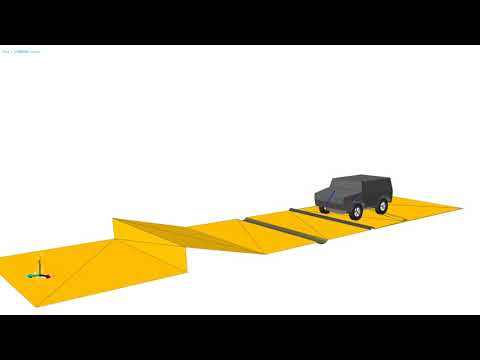

In [7]:
YouTubeVideo('656Unj19nww')

In this project a very simplified model is considered, where the vehicle consists of only one mass point, which is connected to a wheel via a spring-damper system.
In vehicle dynamics, this simplified model is called a quarter car suspension.
The aim is to simulate and visualize the vibration behavior of the spring-damper system.
Virtual test tracks with different road profiles are analysed.

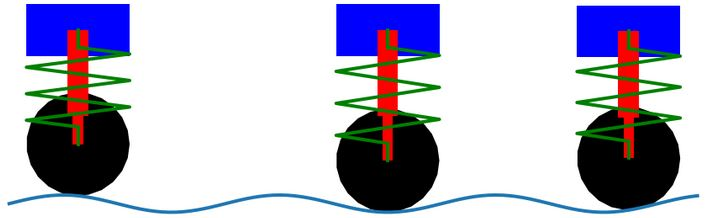

In [8]:
Image('quarter_car_coble_stones.jpg', width=353, height=109)

## 2 Numerical treatment
A mathematical description for both the test track and the spring-damper system is needed.

### 2.1 Coordinate system
The common coordinate system for the test track and the spring-damper system is defined in such a way that the rolling movement of the wheel is in the direction of the $x$-axis and the oscillation of the mass is perpendicular to this in the $y$-direction.
The position of the origin is at the point where the wheel touches the road surface at the beginning of the test track.
The vehicle drives in $x$-direction with constant speed $v$.

### 2.2 Test track
The vibration behaviour of the quarter vehicle is influenced by the mass $m$, which is ideally concentrated in one point.
The aim is to simulate the movement of this mass point.
Starting at time $t_0=0$ the time $t_{\mbox{max}}$ is required to run the test track.
At time $t$ the mass point is located at position

$$
\left(\, x(t) \mid y(t) \,\right), \quad t \in \left[t_0,t_1\right] \, .
$$

To describe the height of road profile at postion $x$ a function $f$ is used:

$$
f(x(t)), \quad t \in \left[t_0,t_1\right] \, .
$$

Since the movement starts at the origin, the function $f$ must fulfill the condition

$$
    f(0)=0.
$$

A simple approach is to simulate a rumble strip test track, represented by the function 

$$
    f(x) = A \, sin( \omega \, x) \, .
    \quad \quad (*)
$$

Here $\omega$ denotes the angular frequency and $A$ is used to specify the height of the rumble strips.   

### 2.3 Equation of motion
For a test track which, apart from a few bumps in the ground, runs horizontally, there is an approximate correlation at constant speed $v$:

$$
x(t) = v \, t, \quad \dot{x}(t) = v \, .
$$

The vertical deflection $y(t)$ of the idealized mass point as a function of time $t$ is not so easy to determine.
Depending on the profile of the test track, the mass oscillates around the equilibrium position, which is designated $y_0$.
The mass point is in the equilibrium position at the beginning of the test drive and the speed in $y$ direction is zero:

$$
y(0) = y_0, \quad \dot{y}(0) = 0.
$$

The aim is to determine a mathematical description of the movement of the mass point as a function of time.
This mathematical description results from the consideration of several physical laws.

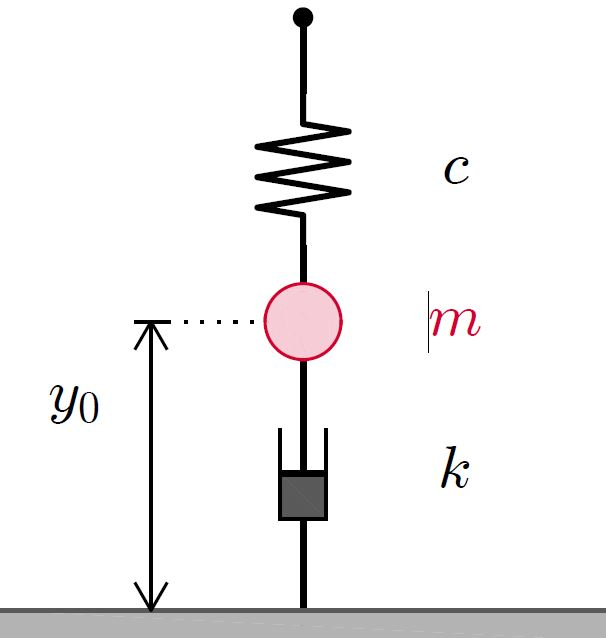

In [9]:
Image('quarter_car_mass_spring_damper.jpg', width=150, height=160)

<b>Spring</b>

According to Hooke's law, the distance of extension or compression of a spring is approximately proportional to the force acting on it.
The proportionality factor $c$ is called the characteristic of the spring.
For the spring force $F_{\mbox{spring}}$, which acts on the mass $m$ at time $t$, the following applies:

$$
F_{\mbox{spring}}(t) = - c \, \underbrace{ \left( y(t) - y_0 - f(x(t)) \right) }_{\mbox{vertical deflection}}.
$$

The vertical deflection at time $t$ depends on the vertical position $y$ of the mass $m$, the equilibrium position $y_0$ and the height of the road profile $f$.
The negative sign results from the fact that the spring force on the mass always acts against the direction of the deflection.

<b>Damper</b>

The damper creates a frictional force $F_{\mbox{damper}}$.
Because of the small speed of the movement in $y$ direction, we assume that the frictional force is proportional to the speed of the mass $m$ in vertical direction.
The proportionality factor $k$ is called damping coefficient.
The frictional force acts against the direction of movement, so the following applies:

$$
	F_{\mbox{damper}}(t)
	= - k \, \underbrace{ \frac{\mbox{d}}{\mbox{d} \, t} \left( y(t) - y_0 - f(x(t)) \right)}_{\mbox{vertical speed}}
	= - k \, \left( \dot{y}(t) - f'(x(t)) \, \dot{x}(t) \right).
$$

The second representation results from the chain rule of differential calculus.
The notation $\dot{y}$ means derivative with respect to time $t$ and $f'$ is the derivative with respect to the distance $x$.

<b>Newton's second law</b>

According to Newton's second law, all external forces are compensated by the mass of that object multiplied by the acceleration:

$$
F_{\mbox{spring}}(t) + F_{\mbox{dumper}}(t) = m \cdot \underbrace{\ddot{y}(t)}_{\mbox{vertical acceleration}}.
$$

<b>Differential equation</b>

Setting the equation for the spring and the equation for the damper into Newton's second law results in:

$$
	m \, \ddot{y}(t) =
	-c \, \left( y(t) - y_0 - f(v \cdot t) \right)
	-k \, \left( \dot{y}(t) - v \, f'(v \cdot t) \right),
	\quad y(0) = y_0, \, \dot{y}(0) = 0. 
    \quad \quad (**)
$$

This initial value problem describes the movement of the mass point in vertical direction.
There are basically two different strategies for determining the solution.
One can determine the exact analytic solution using symbolic mathematical calculations or calculate approximate values by a numerical method.
We will look at both strategies in more detail.  

### 2.4 Analytic solution
The initial value problem $(**)$ is based on a second-order linear ordinary differential equation with constant coefficients.
For such problems the solution of the homogeneous equation is easy to calculate. 

<div class="alert alert-block alert-info">
    
### Task 1: Homogeneous equation <font color=red>(2/2 points)</font>
Use `sympy.dsolve()` to calculate all solutions of the homogenious ordinary differential equation
    
$$
	m \, \ddot{y}(t) + k \, \dot{y}(t) + c \, y(t) = 0 \, .
$$
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 1</b>
</div>

In [10]:
#
# Python code of Task 1
#

    #
    # Python code of Task 1
    #
def quarterCarSolutionHomogen():
                # Define the symbol for time
    t = sp.symbols('t')
        # Define the symbol for the dependent variable y(t)
    y = sp.Function('y')(t)
        # Calculate the first derivative of y(t)
    ys = sp.Derivative(y)
        # Calculate the second derivative of y(t)
    yss = sp.Derivative(ys)
        # Define the differential equation
    differential_equation = sp.Eq(m * yss + k * ys + c * y, 0)

        # Solve the differential equation
    y = sp.dsolve(differential_equation, y)

    return y, differential_equation


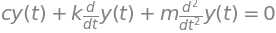

In [11]:
#
# Python code of Task 1
# Definiere eine Funktion quarterCarSolutionHomogenTest, die das homogene Problem löst und das Ergebnis anzeigt
def quarterCarSolutionHomogenTest():
    # Definiere die Symbole m, k und c als globale Variablen
    global m, k, c
    m, k, c = sp.symbols('m, k, c')
    # Rufe die Funktion quarterCarSolutionHomogen auf und speichere das Ergebnis in der Variable y
    y, diff = quarterCarSolutionHomogen()
    # Zeige das Ergebnis y an
    display(y)
    # Zeige eine Leerzeile an
    print("\n\n\n")
    # Zeige die Differentialgleichung diff an
    display(diff)

# Rufe die Funktion quarterCarSolutionHomogenTest auf
quarterCarSolutionHomogenTest()

The non-homogeneous part of the differential equation depends on the function $f$, which describes the test track.
Since the rumple strip test track is represented by a sine function, the exact analytic solution can be calculated with SymPy. 

<div class="alert alert-block alert-info">
    
### Task 2: Initial value problem <font color=red>(2/2 points)</font>
Use `sympy.dsolve()` to calculate the solution of the initial value problem $(**)$ for the rumble strip test track $(*)$. 
</div>

<div class="alert alert-block alert-success">
    
<b>Solution of Task 2</b>

</div>

In [12]:
def quarterCarSolutionIVP():
    # Definiere die Symbole t und y(t)
    t = sp.symbols('t')
    y = sp.Function('y')(t)
    
    # Ableitungen von y(t)
    yp = sp.diff(y, t)
    ypp = sp.diff(yp, t)
    
    # Definiere die Funktion f als Funktion von t
    f = A * sp.sin(omega * t * v)
    # Ableitung von f nach t
    fs = sp.diff(f, t)
    
    # Definiere die Differentialgleichung
    differential_equation = sp.Eq(m * ypp, -c * (y - y_0 - f) - k * (yp - fs))

    # Anfangsbedingungen
    initconds = {y.subs(t, 0): y_0, yp.subs(t, 0): 0}

    # Löse die Differentialgleichung
    y_solution = sp.dsolve(differential_equation, y, ics=initconds)
    
    return y_solution

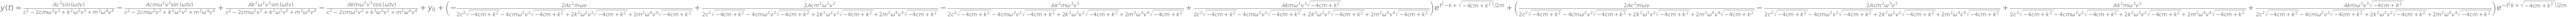

In [13]:
#
# Python code of Task 2
#

# Definiere eine Funktion quarterCarSolutionIVPTest, die das Anfangswertproblem löst und das Ergebnis anzeigt
def quarterCarSolutionIVPTest():
    # Definiere die Symbole m, k, c, y_0, v, A und omega als globale Variablen
    global m, k, c, y_0, v, A, omega
    m, k, c, y_0, v, A, omega = sp.symbols('m, k, c, y_0, v, A, omega')
    
    # Rufe die Funktion quarterCarSolutionIVP auf und speichere das Ergebnis in der Variable y
    y = quarterCarSolutionIVP()
    
    # Gib das Ergebnis y aus
    #sp.pprint(y)

    return y

# Rufe die Funktion quarterCarSolutionIVPTest auf
quarterCarSolutionIVPTest()

### 2.5 Numerical solution
The most basic approximation method for solving ODEs is Euler's method.
In our approach, we will only focus on this simple method.
The idea is to convert the second-order ODE into two first-order ODEs.

<div class="alert alert-block alert-info">
    
### Task 3: State variables <font color=red>(1.5/2 points)</font>
Rewrite the initial value problem $(**)$ into a system with two first-order equations using the state variables $z_0$ and $z_1$.
</div>

<div class="alert alert-block alert-success">
    
<b>Solution of Task 3</b>

$$
    \dot z_0 = z_1
$$

$$
     \text{Anfangswerte: }
     z_0 = y(0), 
     z_1 = \dot y(0)
$$

$$
    m \dot z_1 = -c(z_0 - y_0 - f(v \cdot t)) + k(z_1 - v \cdot \dot f(v \cdot t))
$$

$$
	\dot z_1 = -\frac{-c(z_0 - y_0 - f(v \cdot t)) + k(z_1 - v \cdot \dot f(v \cdot t))}{m}
$$








    










</div>

## 3 Implementation
The implementation should be flexible enough to simulate driving over different test tracks.
It is not guaranteed that the solution of the initial value problem can be exactly calculated analytically for any test track.
Thus the implementation is done with Euler's method.
For this purpose we define numerical values for all physical quantities. 
Please note that the simulation should also work if these values are changed.

In [14]:
def quarterCarNumericalValues():
    m = 150.0   # mass [kg]
    k = 300.0   # damper constant [Ns/m]
    c = 600.0   # spring constant [N/m]
    y_0 = 1.0   # equilibrium [m]
    v = 4.0     # velocity [m/s]
    return m, k, c, y_0, v

### 3.1 Test track
For the rumble strip test track we implement the function `quarterCarRoad()`.
This function not only has a single $x$-value as input argument, but a `numpy.array()` with many $x$-values.
The output consists of two arrays `f` and `fp`, which contain the corresponding function values $f(x)$ and the values of the derivative $f'(x)$ for each $x$ value. 

<div class="alert alert-block alert-info">
    
### Task 4: Rumble strip test track <font color=red>(1.5/2 points)</font>
Implement the function `quarterCarRoad()` for the rumble strip test track and test the function with a plot that shows $f(x)$ and $f'(x)$ for a simulation time of one second in a single plot.
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 4</b>
    
Implementation of function `quarterCarRoad()`:
</div>

In [15]:
def quarterCarRoad(x):
    A = 0.05    # Amplitude [m] - Amplitude der Sinusfunktion
    omega = 5.0 # Frequenz [1/s] - Frequenz der Sinusfunktion
    f = A * np.sin(omega * x)  # Berechnung der Funktion f(x) = A * sin(omega * x)
    fp = A * omega * np.cos(omega * x)  # Berechnung der Ableitung der Funktion f'(x) = A * omega * cos(omega * x)
    return f, fp  # Rückgabe der Funktion f(x) und der Ableitung f'(x) als Tupel


<div class="alert alert-block alert-success">  
Plot:
</div>

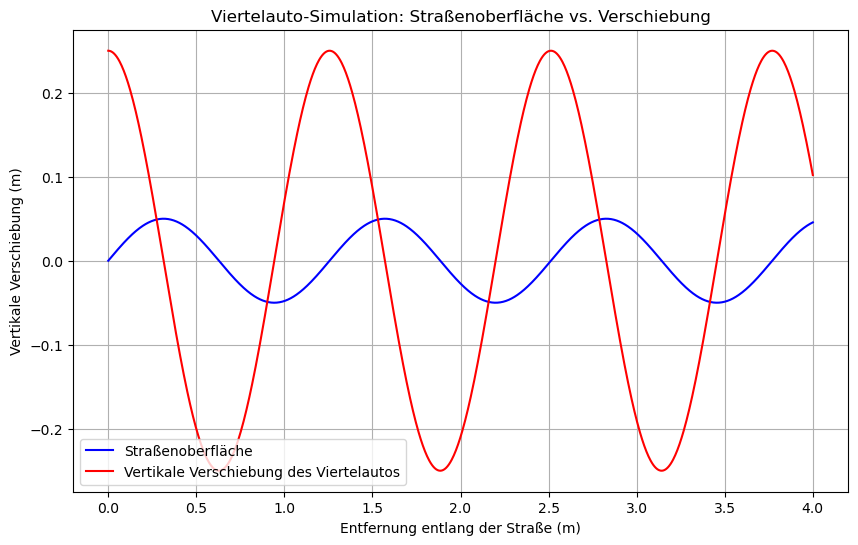

In [16]:
#
# Python code of Task 4
#

# Definiere eine Funktion quarterCarRoadTest, die den Test für die Funktion quarterCarRoad durchführt und das Ergebnis plottet
def quarterCarRoadTest():
    # Definiere die Variablen m, k, c, y_0 und v als globale Variablen
    global m, k, c, y_0, v
    # Weise den Variablen m, k, c, y_0 und v die numerischen Werte zu
    m, k, c, y_0, v = quarterCarNumericalValues()

    # Generiere x-Werte für das Plotten
    x_values = np.linspace(0, v*1, 1000) #MW: korrigierte Version
    # Berechne die Straßenoberfläche und die vertikale Verschiebung des Viertelautos
    road_surface, quarter_car_displacement= quarterCarRoad(x_values)

    # Plotte die Straßenoberfläche und die vertikale Verschiebung des Viertelautos
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, road_surface, label='Straßenoberfläche', color='blue')
    plt.plot(x_values, quarter_car_displacement, label='Vertikale Verschiebung des Viertelautos', color='red')
    plt.title('Viertelauto-Simulation: Straßenoberfläche vs. Verschiebung')
    plt.xlabel('Entfernung entlang der Straße (m)')
    plt.ylabel('Vertikale Verschiebung (m)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Rufe die Funktion quarterCarRoadTest auf
quarterCarRoadTest()

### 3.2 Euler's method
Using the representation of the initial value problem with state variables form task 3 together with the function `quarterCarRoad()` from task 4, the system of differential equations for Euler's method can be implemented.

<div class="alert alert-block alert-info">
    
### Task 5: Quarter car ode <font color=red>(1/1 point)</font>
Implement the function `quarterCarOde()`.
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 5</b>
    
Implementation of function `quarterCarOde()`:
</div>

In [17]:
def quarterCarOde(t,z):
    # Berechne die Funktion f(x) und ihre Ableitung fp(x) für die gegebene Zeit t
    f, fp = quarterCarRoad(v * t)

    # Berechne die Ableitungen der Zustandsvariablen z0 und z1
    zp = np.array([z[1], (-c * (z[0] - y_0 - f) -k * (z[1] - v * fp)) / m])

    # Gib die Ableitungen zurück
    return zp

The basis for Euler's method is the function `quarterCarOde()`.
The step size $h$ is passed to the function for Euler's method as input argument.
The function should return the time values $t$ and the values for the oszilation of the mass $y$.

<div class="alert alert-block alert-info">
    
### Task 6: Euler's method <font color=red>(3/3 points)</font>
Implement Euler's method with the function `quarterCarEuler()` using `quarterCarOde()`.
Generete a plot which shows both, the rumble strip $f$ and the oszilation of the mass $y$ in a single plot.
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 6</b>
    
Implementation of function `quarterCarEuler()`:
</div>

In [18]:
def quarterCarEuler(h=0.01, t0=0.0, t1=1.0):
    # Funktion zur Durchführung der Euler-Methode für das Viertelauto-Modell
    # h: Schrittweite für die Diskretisierung der Zeit
    # t0: Startzeitpunkt
    # t1: Endzeitpunkt
    
    n = int((t1 - t0) / h)
    # Anzahl der Schritte basierend auf der Schrittweite und dem Zeitintervall berechnen
    # n: Anzahl der Schritte
    
    t = np.arange(t0, t1 + h, h)
    # Array mit den Zeitpunkten erstellen, beginnend bei t0, endend bei t1 und Schrittweite h
    # t: Array mit den Zeitpunkten
    
    x = np.zeros([2, n + 1])
    # 2D-Array mit Nullen erstellen, um die Position und Geschwindigkeit des Viertelautos zu speichern
    # x: 2D-Array für Position und Geschwindigkeit
    
    x[:, 0] = np.array([y_0, 0.0])
    # Anfangsbedingungen für Position und Geschwindigkeit setzen
    # x[:, 0]: Anfangswerte für Position und Geschwindigkeit
    
    for k in range(n):
        # Schleife über alle Schritte
        
        x[:, k + 1] = x[:, k] + h * quarterCarOde(t[k], x[:, k])
        # Aktualisierung des Zustands für den nächsten Schritt basierend auf der Euler-Methode
        # x[:, k + 1]: Aktualisierter Zustand für den nächsten Schritt
    
    return t, x[0, :]
    # Rückgabe der Zeitpunkte und der Position des Viertelautos


<div class="alert alert-block alert-success">  
Plot:
</div>

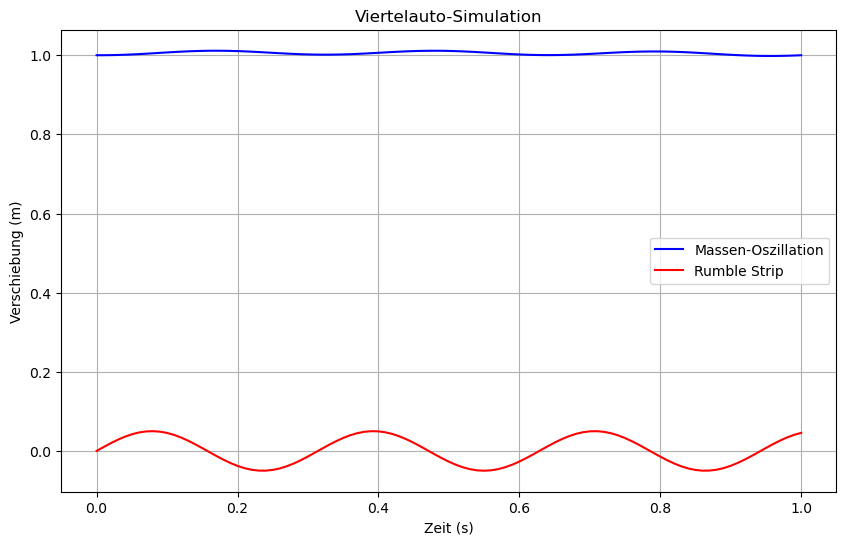

In [19]:
#
# Python code of Task 6
#

# Definiere die Funktion quarterCarEulerTest, um die Simulation mit Euler-Methode durchzuführen und das Ergebnis zu plotten
def quarterCarEulerTest():
    global m, k, c, y_0, v
    m, k, c, y_0, v = quarterCarNumericalValues()
    
    # Rufe quarterCarEuler auf, um die Zeitpunkte und die Position des Viertelautos zu erhalten
    t_values, y_values = quarterCarEuler()
    
    # Generiere Daten für die Straßenoberfläche f für jeden Zeitpunkt
    f_values = [quarterCarRoad(v * t)[0] for t in t_values]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(t_values, y_values, label='Massen-Oszillation', color='blue')
    plt.plot(t_values, f_values, label='Rumble Strip', color='red')
    
    plt.title("Viertelauto-Simulation")
    plt.xlabel("Zeit (s)")
    plt.ylabel("Verschiebung (m)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Rufe die Funktion quarterCarEulerTest auf, um die Simulation zu testen
quarterCarEulerTest()

## 4 Visualization
To visualize a simulation of a test drive, we need a graphical representation of the road profile and the quarter vehicle.

### 4.1 Quarter car
The function `quarterCarDraw()` represents the quarter car.
It must be taken into account that the representation of the spring and damper changes dynamically due to the oscillation process.
In the state of equilibrium the center of the mass is located at a distance of $y_0$ above the roadway.
With the function `quarterCarDraw()` the model of the quarter car can be drawn at any position $x$.
The second input argument $y$ specifies the $y$ position of the mass.

In [20]:
def quarterCarDraw(x,y,f):
    
    # figure
    fig = plt.gcf()  # Aktuelle Abbildung abrufen
    
    # get axis of figure
    ax = fig.gca()  # Achsen der Abbildung abrufen
    ax.axis('equal')  # Achsenverhältnis auf gleich setzen, um eine korrekte Darstellung zu gewährleisten
        
    # wheel
    rr = 0.3; # wheel radius
    tt = np.linspace(0,2*np.pi,24)  # Winkelwerte für das Rad erstellen
    ax.fill(x+rr*np.cos(tt),f+rr+rr*np.sin(tt),'k')  # Rad zeichnen
        
    # mass
    ww = 0.6 # mass width
    hh = 0.3 # mass height
    xx = np.array([-1.0, 1.0, 1.0,-1.0,-1.0])  # x-Koordinaten für die Masse erstellen
    yy = np.array([-1.0,-1.0, 1.0, 1.0,-1.0])  # y-Koordinaten für die Masse erstellen
    ax.fill(x+0.5*ww*xx,y+0.5*hh*yy,'b')  # Masse zeichnen

    # absorber
    aa = 0.5 # absorber length
    yy = np.array([ 0.0, 0.0, 1.0, 1.0, 0.0])  # y-Koordinaten für den Absorber erstellen
    ax.fill(x+0.1*ww*xx,y-aa*yy,'r')  # Absorber zeichnen
    ax.fill(x+0.05*ww*xx,f+rr+aa*yy,'r')  # Absorber zeichnen

    # spring
    ll = 0.1 # spring length
    dd = (y - f - 2*ll - rr)/6.0  # Abstand zwischen den Federn berechnen
    xx = np.array([0.0,-rr,rr,-rr,rr,-rr,rr,0.0])  # x-Koordinaten für die Feder erstellen
    yy = np.array([0.0,0.5,1.5,2.5,3.5,4.5,5.5,6])  # y-Koordinaten für die Feder erstellen
    ax.plot(np.array([x,x]),f+rr+np.array([0.0,ll]),'g',linewidth=4)  # Feder zeichnen
    ax.plot(x+xx,f+rr+ll+dd*yy,'g',linewidth=4)  # Feder zeichnen
    ax.plot(np.array([x,x]),y-np.array([ll,0.0]),'g',linewidth=4)  # Feder zeichnen
    
    return

The position $y$ should be calculated by Euler's method before using it as input for the function `quarterCarDraw()`.

In [21]:
def quarterCarDrawTest():
    global m, k, c, y_0, v
    m, k, c, y_0, v = quarterCarNumericalValues()

    # oszilation of the mass y 
    t, y = quarterCarEuler()

    # road f
    x = v*t
    f, fp = quarterCarRoad(x)

    # figure
    fig = plt.gcf()
    fig.clf()
    fig.set_size_inches(20,5)

    # get axis of figure
    ax = fig.gca()
 
    # draw road
    ax.plot(x,f,'-b')
 
    # draw quarter car
    n = np.size(t)
    quarterCarDraw(x[n//2],y[n//2],f[n//2])
    
    return


In [22]:
if 'google.colab' in str(get_ipython()):
    print('IFrame() does not work with Google Colab')
else:
    display(IFrame('quarter_car_rumble_strip.gif', width=720, height=180))

<div class="alert alert-block alert-info">
    
### Task 7: Animation <font color=red>(3/3 points)</font>

Implement a frame function and generate an animation video of the quarter car on the rumble strip test track.
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 7</b>
    
Frame function:
</div>

In [23]:
def quarterCarFrame(k):
    fig.clf()

    # get axis of figure
    ax = fig.gca()

    # draw road
    ax.plot(x,f,'-b')
    ax.plot(x[:k],y[:k],'.b')

    # draw

    # draw quarter car
    quarterCarDraw(x[k],y[k],f[k])

    return

<div class="alert alert-block alert-success">  
<b>Solution of Task 7</b>
    
Generation of an animation video:
</div>

In [24]:
def quarterCarAnimation():
    global m, k, c, y_0, v, x, y, f, fig
    m, k, c, y_0, v = quarterCarNumericalValues()

    # oszilation of the mass y
    t, y = quarterCarEuler()

    # road f
    x = v*t
    f, fp = quarterCarRoad(x)

    # figure
    fig = plt.gcf()
    fig.set_size_inches(20,5)

    return FuncAnimation(fig, quarterCarFrame, frames=np.arange(1,100))

display(HTML(quarterCarAnimation().to_jshtml()))

# close figure
plt.close(plt.gcf())

## 5 Evaluation
In the simulation of the quarter car, the differences between verification and validation can be clearly illustrated when evaluating a simulation.   
During verification, we check whether the results of the calculations are in line with our theoretical model.
The task of validation is to assess the extent to which this simulation allows conclusions to be drawn about the vehicle's driving dynamics.

### 5.1 Verification
With simulations based on numerical solution methods, the question arises as to how reliable the numerical approximate values are.
The accuracy of Euler's method depends mainly on the step size $h$.
One needs small step sizes in order to solve the problem with a corresponding accuracy.
On the other hand, small step sizes require considerably more steps and thus more calculation operations.
This increases the computing time required to run a simulation.
A further disadvantage of small step sizes is the rounding error problem.

The trick is now to determine a step size optimally adapted to the problem.
The determination of optimal step sizes is a central topic of numerical mathematics.
However, this determination requires a deeper understanding of numerical approximation methods.
We are therefore content with an experimental consideration.
For a sinusoidal road profile, we have already implemented the calculation of the exact symbolic solution, see `quarterCarSolutionIVP()`.
Thus we can compare the numerically calculated approximate values with the analytically determined exact solution for this road profile.

The idea is to use SymPy as a code generator for the exact analytical solution.
The function `quarterCarAnalytic()` should be implemented according to the function `quarterCarEuler()`.
The step size $h$ is passed as input argument to the function.
The function should return the time values $t$ and the values for the oszilation of the mass $y$.

<div class="alert alert-block alert-info">
    
### Task 8: Code generation <font color=red>(2/2 points)</font>

Use `sympy.lambdify()`, `quarterCarNumericalValues()` and `quarterCarSolutionIVP()` to implement the function `quarterCarAnalytic()`.
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 8</b>
    
Implementation of 'quarterCarAnalytic()`:
</div>

In [25]:
def quarterCarAnalytic(h=0.01, t0=0.0, t1=1.0):
  # Unpack only the values returned by quarterCarNumericalValues()
  m, k, c, y_0, v = quarterCarNumericalValues()

  # Annahme, dass quarterCarSolutionIVP() einen sympy-Ausdruck mit 'rhs' zurückgibt, der die Lösung repräsentiert
  solution_expr = quarterCarSolutionIVP().rhs

  # Ersetze die numerischen Werte in der Gleichung, unter Verwendung von global definierten A und omega
  f = sp.lambdify('t',solution_expr)
  
  # Generiere Zeitpunkte und werte die Lösung aus
  n = int((t1 - t0) / h)
  t = np.linspace(t0, t1, n + 1)
  y = f(t)
  return t, y


In [26]:
def quarterCarAnalyticTest():
    global m, k, c, y_0, v, A, omega
    # Deklariere globale Variablen, um sie in der Funktion verwenden zu können
    # Diese Variablen werden in den Funktionen quarterCarNumericalValues(), quarterCarAnalytic() und quarterCarEuler() zugewiesen
    # m, k, c, y_0, v: Variablen für die numerischen Werte des Viertelauto-Modells
    # A, omega: Variablen für die Amplitude und Frequenz der analytischen Lösung

    m, k, c, y_0, v = quarterCarNumericalValues()
    # Rufe die Funktion quarterCarNumericalValues() auf, um die numerischen Werte des Viertelauto-Modells zu erhalten
    # Weise die zurückgegebenen Werte den entsprechenden Variablen zu

    A = 0.05
    omega = 5.0
    # Weise den globalen Variablen A und omega bestimmte Werte zu
    # Diese Werte werden für die analytische Lösung verwendet

    t1, y1 = quarterCarAnalytic()
    # Rufe die Funktion quarterCarAnalytic() auf, um die analytische Lösung des Viertelauto-Modells zu erhalten
    # Weise die zurückgegebenen Zeitpunkte t1 und Positionen y1 den entsprechenden Variablen zu

    t2, y2 = quarterCarEuler()
    # Rufe die Funktion quarterCarEuler() auf, um die numerische Lösung des Viertelauto-Modells mit der Euler-Methode zu erhalten
    # Weise die zurückgegebenen Zeitpunkte t2 und Positionen y2 den entsprechenden Variablen zu

    plt.plot(t1,y1,'-b',t2,y2,'-r')
    # Plotte die analytische Lösung (t1,y1) als blaue Linie und die numerische Lösung (t2,y2) als rote Linie

<div class="alert alert-block alert-info">
    
### Task 9: Step size <font color=red>(1/1 point)</font>
Use the functions `quarterCarEuler()` and `quarterCarAnalytic()` to determine the maximum deviation of the numerical approximate values from the exact analytical solution.
For this purpose use the step sizes $h=0.01$, $h=0.001$ and $h=0.0001$. 
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 9</b>
    
Maximum deviation of the numerical approximate values from the exact analytical solution:
</div>

In [28]:
def quarterCarStepSize():
    # Stelle sicher, dass alle erforderlichen Werte definiert sind oder als Parameter übergeben werden
    m, k, c, y_0, v = quarterCarNumericalValues()  # Annahme: Diese Funktion liefert die erforderlichen Parameter
    A = 0.05
    omega = 5.0

    # Initialisiere das Dictionary für maximale Abweichungen
    max_deviations = {}

    for h in [0.01, 0.001, 0.0001]:
        # Berechne die numerischen Näherungswerte
        t_numerical, y_numerical = quarterCarEuler(h=h)
        
        # Berechne die exakte analytische Lösung
        t_exact, y_exact = quarterCarAnalytic(h=h)

        # Berechne die Abweichung für jeden Zeitschritt
        deviation = np.abs(y_numerical - y_exact)

        # Aktualisiere die maximale Abweichung, falls erforderlich
        if h not in max_deviations:
            max_deviations[h] = np.max(deviation)
        else:
            max_deviations[h] = max(max_deviations[h], np.max(deviation))

    # Zeige die Ergebnisse an
    for h, dev in max_deviations.items():
        print(f"Maximale Abweichung für Schrittweite={h} beträgt {dev}")

    return max_deviations

quarterCarStepSize()

TypeError: loop of ufunc does not support argument 0 of type Zero which has no callable cos method

In simulations based on numerical solutions of differential equations, the calculations are often performed using Runge-Kutta methods.
Compared to Euler's method, higher order Runge-Kutta methods produce more accurate results.
In addition, Runge-Kutta methods offer good methods for error estimation and, based on these, mechanisms for automatic step size control.

### 5.2 Validation
A further aspect in the evaluation is the question of whether the simulation actually provides usable results for vehicle dynamics.
It should be kept in mind that the quarter car only provides a rough model, in which some important factors, such as the stiffness of the entire vehicle or the distribution of the mass to the individual wheels, are not taken into account.

## 6 Embedding
It would be nice to have a graphical user interface for embedding the simulation.
This user interface could offer a selection of different road profiles for selection and take over the configuration of the parameters of the quarter car.
A graphical editor for creating different road profiles would be helpful.  

In [ ]:
if 'google.colab' in str(get_ipython()):
    print('IFrame() does not work with Google Colab')
else:
    display(IFrame('quarter_car_ramp.gif', width=720, height=180))

<div class="alert alert-block alert-info">
    
## Task 10: Ramp test track <font color=red>(2/2 points)</font>
A test track with a ramp can be simulated by the function
    
$$
    f(x) = \left\{
    \begin{array}{ccl}
        0        & \mbox{ for } & x \leq 1,\\
        0.2(x-1) & \mbox{ for } & 1 < x \leq 2,\\
        0.2      & \mbox{ for } & x > 2.\\
    \end{array}
    \right.
$$
    
Reimplement the function `quarterCarRoad()` and generate an animation video of the quarter car on the test track with this ramp.
</div>

<div class="alert alert-block alert-success">  
<b>Solution of Task 10</b>
    
Reimplementation of the function `quarterCarRoad()` :
</div>

In [ ]:
#
# Python-Code für Aufgabe 10
#
def quarterCarRoad(x):
    if isinstance(x, np.ndarray):
        # Wenn x ein numpy-Array ist, berechne f und fp für jedes Element in x
        f = np.piecewise(x, [x <= 1, (1 < x) & (x <= 2), x > 2], [0, lambda x: 0.2 * (x - 1), 0.2])
        # Berechne die Ableitung von f
        fp = np.gradient(f)
    else:
        # Wenn x ein einzelner Wert ist, berechne f und fp basierend auf dem Wert von x
        if x <= 1:
            f = 0.0
            fp = 0.0
        elif 1 < x <= 2:
            f = 0.2 * (x - 1)
            fp = 0.2
        else:
            f = 0.2
            fp = 0.0
    return f, fp


In [ ]:
display(HTML(quarterCarAnimation().to_jshtml()))
# close figure
#plt.close(plt.gcf())

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

def quarterCarRoad(x):
    # Überprüfe, ob x ein numpy-Array ist
    if isinstance(x, np.ndarray):
        # Berechne f und fp für jedes Element in x
        f = np.piecewise(x, 
                         [x <= 1, 
                          (1 < x) & (x <= 2), 
                          (2 < x) & (x <= 3), 
                          (3 < x) & (x <= 4),
                          x > 4], 
                         [0, 
                          lambda x: 0.15 * np.sin(np.pi * (x - 1)),  # Höhere Amplitude
                          lambda x: -0.15 * np.sin(np.pi * (x - 2)),  # Invertierter Sinus
                          lambda x: 0.15 * np.sin(np.pi * (x - 3)),  # Höhere Amplitude
                          0])
        # Berechne die Ableitung von f
        fp = np.gradient(f)
    else:
        # Berechne f und fp basierend auf dem Wert von x
        if x <= 1:
            f = 0.0
            fp = 0.0
        elif 1 < x <= 2:
            f = 0.15 * np.sin(np.pi * (x - 1))
            fp = 0.15 * np.pi * np.cos(np.pi * (x - 1))
        elif 2 < x <= 3:
            f = -0.15 * np.sin(np.pi * (x - 2))
            fp = -0.15 * np.pi * np.cos(np.pi * (x - 2))
        elif 3 < x <= 4:
            f = 0.15 * np.sin(np.pi * (x - 3))
            fp = 0.15 * np.pi * np.cos(np.pi * (x - 3))
        else:
            f = 0.0
            fp = 0.0
    return f, fp

# Erstelle die Daten
x_values = np.linspace(0, 5, 500)
y_values, y_prime = quarterCarRoad(x_values)

# Zeichne die Strecke
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, color='blue')
plt.title('Sanfte Zickzack Ramp Test Track mit invertiertem Abschnitt')
plt.xlabel('Distanz')
plt.ylabel('Höhe')
plt.grid(True)
plt.show()

# Erstelle die Animation
anim = quarterCarAnimation()

# Zeige die Animation im Jupyter Notebook an
display(HTML(anim.to_jshtml()))

# Speichern des HTML-Codes in eine Datei
html_code = anim.to_jshtml()
html_file = "quarter_car_animation.html"
with open(html_file, "w") as f:
    f.write(html_code)

## Literature
 - [https://en.wikipedia.org/wiki/Vehicle_dynamics](https://en.wikipedia.org/wiki/Vehicle_dynamics)
 - [https://en.wikipedia.org/wiki/Euler_method](https://en.wikipedia.org/wiki/Euler_method)
 - [https://en.wikipedia.org/wiki/Runge-Kutta_methods](https://en.wikipedia.org/wiki/Runge-Kutta_methods)
 - [J.Koch, M.Stämpfle: Mathematik für das Ingenieurstudium](https://www.hanser-fachbuch.de/buch/Mathematik+fuer+das+Ingenieurstudium/9783446451667)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def quarterCarRoad(x):
    if isinstance(x, np.ndarray):
        f = np.piecewise(x, 
                         [x <= 31.4, 
                          (31.4 < x) & (x <= 44), 
                          (44 < x) & (x <= 50.27),
                          x > 50.27], 
                         [lambda x: 4 * np.sin(0.2 * x),  # Erste Sinuskurve
                          lambda x: -np.sin(x - np.pi),  # Invertierte Sinuskurve
                          lambda x: 2 * np.cos((x - np.pi / 3)) - 1,  # Kosinuskurve
                          0])
        # Berechne die Ableitung von f
        fp = np.gradient(f)
    else:
        if x <= 31.4:
            f = 4 * np.sin(0.2 * x)
            fp = 0.8 * np.cos(0.2 * x)
        elif 31.4 < x <= 44:
            f = -np.sin(x - np.pi)
            fp = -np.cos(x - np.pi)
        elif 44 < x <= 50.27:
            f = 2 * np.cos((x - np.pi / 3)) - 1
            fp = -2 * np.sin((x - np.pi / 3))
        else:
            f = 0.0
            fp = 0.0
    return f, fp

# Erstelle die Daten
x_values = np.linspace(0, 55, 6000)  # Erzeuge 600 gleichmäßig verteilte Werte zwischen 0 und 6
y_values, y_prime = quarterCarRoad(x_values)  # Berechne die Funktionswerte und ihre Ableitungen

# Zeichne die Strecke
plt.figure(figsize=(10,5))  # Erzeuge eine Figur mit einer Größe von 10x5 Zoll
plt.plot(x_values, y_values, color='blue')  # Zeichne die Funktionswerte als blaue Linie
plt.title('Sanfte Zickzack Ramp Test Track mit unterschiedlichen Amplituden und Phasenverschiebungen')  # Setze den Titel des Plots
plt.xlabel('Distanz')  # Beschrifte die x-Achse
plt.ylabel('Höhe')  # Beschrifte die y-Achse
plt.grid(True)  # Aktiviere das Gitter im Hintergrund
plt.show()  # Zeige den Plot an


In [ ]:
display(HTML(quarterCarAnimation().to_jshtml()))
#plt.close(plt.gcf())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def quarterCarRoad(x):
    if isinstance(x, np.ndarray):
        f = np.piecewise(x, 
                         [x <= 1, 
                          (1 < x) & (x <= 2), 
                          (2 < x) & (x <= 3), 
                          (3 < x) & (x <= 4),
                          x > 4], 
                         [0, 
                          lambda x: 0.15 * np.sin(np.pi * (x - 1)),  # Höhere Amplitude
                          lambda x: -0.15 * np.sin(np.pi * (x - 2)),  # Invertierter Sinus
                          lambda x: 0.15 * np.sin(np.pi * (x - 3)),  # Höhere Amplitude
                          0])
        # Berechne die Ableitung von f
        fp = np.gradient(f)
    else:
        if x <= 1:
            f = 0.0
            fp = 0.0
        elif 1 < x <= 2:
            f = 0.15 * np.sin(np.pi * (x - 1))
            fp = 0.15 * np.pi * np.cos(np.pi * (x - 1))
        elif 2 < x <= 3:
            f = -0.15 * np.sin(np.pi * (x - 2))
            fp = -0.15 * np.pi * np.cos(np.pi * (x - 2))
        elif 3 < x <= 4:
            f = 0.15 * np.sin(np.pi * (x - 3))
            fp = 0.15 * np.pi * np.cos(np.pi * (x - 3))
        else:
            f = 0.0
            fp = 0.0
    return f, fp

# Erstelle die Daten
x_values = np.linspace(0, 5, 500)
y_values, y_prime = quarterCarRoad(x_values)

# Zeichne die Strecke
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, color='blue')
plt.title('Sanfte Zickzack Ramp Test Track mit invertiertem Abschnitt')
plt.xlabel('Distanz')
plt.ylabel('Höhe')
plt.grid(True)
plt.show()
# Animation erzeugen und anzeigen
anim = quarterCarAnimation()
display(HTML(anim.to_jshtml()))
html_code = anim.to_jshtml()

# Speichern des HTML-Codes in eine Datei
html_file = "quarter_car_animation_neu.html"
with open(html_file, "w") as f:
    f.write(html_code)

# Schließe die Abbildung
plt.close(plt.gcf())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Definiert die numerischen Werte für das Viertelfahrzeugmodell
def quarterCarNumericalValues():
    global m, k, c, y_0, v
    m = 250  # Masse des Viertelfahrzeugs
    k = 15000  # Federkonstante
    c = 1000  # Dämpfungskonstante
    y_0 = 0.1  # Anfangshöhe
    v = 10  # Fahrzeuggeschwindigkeit
    return m, k, c, y_0, v

# Definiert die Straßenfunktion und ihre Ableitung
def quarterCarRoad(x):
    if isinstance(x, np.ndarray):
        # Straßenprofil als stückweise definierte Funktion
        f = np.piecewise(x, 
                         [x <= 2 * np.pi, 
                          (2 * np.pi < x) & (x <= 4 * np.pi), 
                          (4 * np.pi < x) & (x <= 6 * np.pi),
                          (6 * np.pi < x) & (x <= 20),  # Erweiterung der Straße bis x = 20
                          x > 20],  # Bedingung für x > 20
                         [lambda x: 4 * np.sin(x),  
                          lambda x: -np.sin(x - np.pi),  
                          lambda x: 2 * np.cos((x - np.pi / 3)) - 1,  
                          0,
                          0])  # Setzt f auf 0 für x > 20
        fp = np.gradient(f)  # Berechnet die Ableitung von f
    else:
        if x <= 2 * np.pi:
            f = 4 * np.sin(x)
            fp = 4 * np.cos(x)
        elif 2 * np.pi < x <= 4 * np.pi:
            f = -np.sin(x - np.pi)
            fp = -np.cos(x - np.pi)
        elif 4 * np.pi < x <= 6 * np.pi:
            f = 2 * np.cos((x - np.pi / 3)) - 1
            fp = -2 * np.sin((x - np.pi / 3))
        elif 6 * np.pi < x <= 20:
            f = 0
            fp = 0
        else:
            f = 0.0
            fp = 0.0
    return f, fp

# Erstellt die Animation des Viertelfahrzeugs
def quarterCarAnimation():
    global m, k, c, y_0, v, fig
    m, k, c, y_0, v = quarterCarNumericalValues()

    # Oszillation der Masse y berechnen
    t, x = quarterCarEuler()

    # Straßenprofil berechnen
    f, fp = quarterCarRoad(v * t)

    # Abbildung
    fig = plt.figure(figsize=(20, 5))

    # Animation erstellen
    anim = FuncAnimation(fig, quarterCarFrame, frames=len(t), repeat=False)

    return anim

# Numerische Lösung der Bewegungsgleichung mittels Eulerschem Verfahren
def quarterCarEuler(h=0.01, t0=0.0, t1=5.0):
    n = int((t1 - t0) / h)  # Anzahl der Zeitschritte
    t = np.linspace(t0, t1, n+1)  # Zeitarray
    x = np.zeros([2, n + 1])  # Array für Position und Geschwindigkeit
    x[:, 0] = np.array([y_0, 0.0])  # Anfangswerte

    for k in range(n):
        x[:, k + 1] = x[:, k] + h * quarterCarOde(t[k], x[:, k])  # Euler-Schritt

    return t, x[0, :]  # Rückgabe der Zeit und Position

# Definiert die Bewegungsgleichungen des Systems
def quarterCarOde(t, z):
    f, fp = quarterCarRoad(v * t)
    zp = np.array([z[1], (-c * (z[0] - y_0 - f) - k * (z[1] - v * fp)) / m])
    return zp

# Zeichnet den aktuellen Frame der Animation
def quarterCarFrame(k):
    plt.clf()
    ax = plt.gca()

    # Zeichnet die Straße
    ax.plot(x, f, '-b')
    ax.plot(x[:k], y[:k], '.b')

    # Zeichnet das Viertelfahrzeug
    quarterCarDraw(x[k], y[k], f[k])

    # Zoom auf den aktuellen Bereich
    ax.set_xlim(x[k] - 5, x[k] + 5)  # Zoom auf x-Koordinate des Autos
    ax.set_ylim(f[k] - 2, f[k] + 2)  # Zoom auf die Höhe des Autos

# Zeichnet das Viertelfahrzeug
def quarterCarDraw(x, y, f):
    # Rad
    rr = 0.5  # Radius des Rads
    tt = np.linspace(0, 2 * np.pi, 24)
    plt.fill(x + rr * np.cos(tt), f + rr + rr * np.sin(tt), 'k')

    # Masse
    ww = 0.6
    hh = 0.3
    xx = np.array([-1.0, 1.0, 1.0, -1.0, -1.0])
    yy = np.array([-1.0, -1.0, 1.0, 1.0, -1.0])
    plt.fill(x + 0.5 * ww * xx, y + 0.5 * hh * yy, 'b')

    # Dämpfer
    aa = 0.5
    yy = np.array([0.0, 0.0, 1.0, 1.0, 0.0])
    plt.fill(x + 0.1 * ww * xx, y - aa * yy, 'r')
    plt.fill(x + 0.05 * ww * xx, f + rr + aa * yy, 'r')

    # Feder
    ll = 0.1
    dd = (y - f - 2 * ll - rr) / 6.0
    xx = np.array([0.0, -rr, rr, -rr, rr, -rr, rr, 0.0])
    yy = np.array([0.0, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6])
    plt.plot(np.array([x, x]), f + rr + np.array([0.0, ll]), 'g', linewidth=4)
    plt.plot(x + xx, f + rr + ll + dd * yy, 'g', linewidth=4)
    plt.plot(np.array([x, x]), y - np.array([ll, 0.0]), 'g', linewidth=4)

# Erstellt die Animation des Viertelfahrzeugs
def quarterCarAnimation():
    global m, k, c, y_0, v, x, y, f, fig
    m, k, c, y_0, v = quarterCarNumericalValues()

    # Oszillation der Masse y berechnen
    t, y = quarterCarEuler()

    # Straßenprofil berechnen
    x = v * t
    f, fp = quarterCarRoad(x)

    # Abbildung
    fig = plt.gcf()
    fig.set_size_inches(20, 5)

    return FuncAnimation(fig, quarterCarFrame, frames=np.arange(1, len(x)))

# Animation erzeugen und anzeigen
anim = quarterCarAnimation()
display(HTML(anim.to_jshtml()))
html_code = anim.to_jshtml()

# Speichern des HTML-Codes in eine Datei
html_file = "quarter_car_animation.html"
with open(html_file, "w") as f:
    f.write(html_code)

# Schließe die Abbildung
plt.close(plt.gcf())
